In [2]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [3]:
dataMaterial24Ene = pd.read_excel("./../data/31Enero.xls",sheet_name="Base por material", dtype={'Identificador del Chip': str})
dataMaterial24Feb = pd.read_excel("./../data/Febrero29.xls",sheet_name="Base por material", dtype={'Identificador del Chip': str})
dataMaterial24Mar = pd.read_excel("./../data/Marzo31.xls",sheet_name="Base por material", dtype={'Identificador del Chip': str})
dataMaterial24Abr = pd.read_excel("./../data/Abril30.xls",sheet_name="Base por material", dtype={'Identificador del Chip': str})
dataMaterial24May = pd.read_excel("./../data/Mayo31.xls",sheet_name="Base por material", dtype={'Identificador del Chip': str})
dataMaterial24Jun = pd.read_excel("./../data/Junio30.xls",sheet_name="Base por material", dtype={'Identificador del Chip': str})

dataLector24Ene = pd.read_excel("./../data/31Enero.xls",sheet_name="Base por lector", dtype={'Identificador del Chip': str})
dataLector24Feb = pd.read_excel("./../data/Febrero29.xls",sheet_name="Base por lector", dtype={'Identificador del Chip': str})
dataLector24Mar = pd.read_excel("./../data/Marzo31.xls",sheet_name="Base por lector", dtype={'Identificador del Chip': str})
dataLector24Abr = pd.read_excel("./../data/Abril30.xls",sheet_name="Base por lector", dtype={'Identificador del Chip': str})
dataLector24May = pd.read_excel("./../data/Mayo31.xls",sheet_name="Base por lector", dtype={'Identificador del Chip': str})
dataLector24Jun = pd.read_excel("./../data/Junio30.xls",sheet_name="Base por lector", dtype={'Identificador del Chip': str})

data = pd.concat([
    dataMaterial24Ene,
    dataLector24Ene,
    dataMaterial24Feb,
    dataLector24Feb,
    dataMaterial24Mar,
    dataLector24Mar,
    dataMaterial24Abr,
    dataLector24Abr,
    dataMaterial24May,
    dataLector24May,
    dataMaterial24Jun,
    dataLector24Jun])

In [4]:
"""
tre = pd.read_csv("./../data/pru.csv",delimiter=';')
ee = tre.iloc[:40]
iio = ee['Identificador del Chip']
iio = iio.fillna(0)
iio = iio.astype(np.int64)
iio
"""
# codigo para mantener la exactitud de los iccids
"""
file_path = './../data/Mayo31.xls'
dff = pd.read_excel(file_path, sheet_name="Base por material", dtype={'Identificador del Chip': str})
uuu = dff.iloc[:40]
uuu['Identificador del Chip']
"""

'\nfile_path = \'./../data/Mayo31.xls\'\ndff = pd.read_excel(file_path, sheet_name="Base por material", dtype={\'Identificador del Chip\': str})\nuuu = dff.iloc[:40]\nuuu[\'Identificador del Chip\']\n'

# LIMPIEZA Y TRANFORMACION DE DATOS

## Initial Validations

In [5]:
required_columns = [    
    'Antiguedad Cedente',
    'Identificador del operador cedente',
    'Cantidad de días de antiguedad',
    'Modalidad segmento del operador cedente',
    'Descripción operador cedente',
    'Fecha desde que el cliente estuvo en operador cedente',
  
    'Modalidad de venta',
    'Claro TV',
    'Internet Fija',
    'Telefonía Fija',
    
    'Tipo documento del vendedor',
    'DNI del dueño de multimarca',
    'Número de documento del vendedor',
    'Flag Login Vendedor',
    'Fecha Registro del dueño del multimarca',
    
    'Mes',
    'Fecha de venta',
    'Identificador del Chip',
    'Serie del lector biométrico móvil',
    'Número de telefono',
    'Flag Recarga',
    'Tipo de operación de venta',
    'Modalidad segmento de venta',
    'Descipción del plan',
    'Número del pedido rerlacionado a la venta',
    'Número de evaluación crediticia',
    'Número de la orden de trabajo',
    'Tipo venta C-CHIP/P-Pack',
    'Identificador del equipo (IMEI)',
    
    'Aplicativo donde se realizó la venta',
    'Canal del punto de venta del material',
    'Plataforma',
    
    'Región asociado al punto de venta del chip',
    'Dpto asociado al punto de venta del chip',
    
    'Razón social del dueño (LECTOR)',
    'RUC del dueño al que se despaño el lector biométrico móvil',
    'Razón social del dueño del chip que realizó la venta (MATERIAL)',
    'RUC del dueño del chip que realizó la venta',
    'Descripción del punto de venta del material',
    'Código del punto de venta del material',

    'Tipo de operación del biométrico',
    'Tipo Val Biométrica',
    'Tipo Venta Biométrico',
    'Usuario de Biometría "Biomovil"',
    'Venta Realizada Por',
]

columnas_faltantes = [col for col in required_columns if col not in data.columns]

if columnas_faltantes:
    print(f"Las siguientes columnas faltan en el DataFrame: {columnas_faltantes}")
else:
    print("Todas las columnas requeridas están presentes.")

Todas las columnas requeridas están presentes.


In [6]:
nulo1 = data['Aplicativo donde se realizó la venta'].isna().sum()
nulo2 = data['Canal del punto de venta del material'].isna().sum()
nulo3 = data['Descripción del punto de venta del material'].isna().sum()
nulo4 = data['Código del punto de venta del material'].isna().sum()
nulo5 = data['Dpto asociado al punto de venta del chip'].isna().sum()
nulo6 = data['Mes'].isna().sum()
nulo7 = data['Modalidad segmento de venta'].isna().sum()
nulo8 = data['Tipo de operación de venta'].isna().sum()
nulo9 = data['Región asociado al punto de venta del chip'].isna().sum()
nulo10 = data['Tipo de operación del biométrico'].isna().sum()
nulo11 = data['Tipo Val Biométrica'].isna().sum()
nulo12 = data['Tipo Venta Biométrico'].isna().sum()
nulo13 = data['Usuario de Biometría "Biomovil"'].isna().sum()
nulo14 = data['Venta Realizada Por'].isna().sum()

print(nulo1+nulo2+nulo3+nulo4+nulo5+nulo6+nulo7+nulo8+nulo9+nulo10+nulo11+nulo12+nulo13+nulo14)

0


## Manage columns

In [7]:
data.rename(columns={
    'Antiguedad Cedente':'CEDENT_ISMORETHAN90DAYS',
    'Identificador del operador cedente':'CEDENT_CODOPERADOR',
    'Cantidad de días de antiguedad':'CEDENT_DIASANTIGUEDAD',
    'Modalidad segmento del operador cedente':'CEDENT_PRODUCT',
    'Descripción operador cedente':'CEDENT_OPERATOR',
    'Fecha desde que el cliente estuvo en operador cedente':'CEDENT_DATE',
    
    'Modalidad de venta':'PLAY',
    'Claro TV':'FIJA_TV',
    'Internet Fija':'FIJA_INTERNET',
    'Telefonía Fija':'FIJA_PHONE',

    'Tipo documento del vendedor':'DOCUMENT_TYPE_SELLER',
    'DNI del dueño de multimarca':'DNI_MM',
    'Número de documento del vendedor':'DOCUMENT_NRO_SELLER',
    'Flag Login Vendedor':'FLAG_LOGIN_SELLER',
    'Fecha Registro del dueño del multimarca':'FECHA_REGISTER_MM',
    
    'Mes':'PERIOD',
    'Fecha de venta':'FECHA_VENTA',
    'Identificador del Chip':'CHIP',
    'Serie del lector biométrico móvil':'BIOMETRIC_SERIE',
    'Número de telefono':'PHONE_NUMBER',
    'Flag Recarga':'RECHARGE',
    'Tipo de operación de venta':'OPE_VENTA',
    'Modalidad segmento de venta':'PRODUCT',
    'Descipción del plan':'PLAN_DESCRIPTION',
    'Número del pedido rerlacionado a la venta':'CONTRATO',
    'Número de evaluación crediticia':'SEC',
    'Número de la orden de trabajo':'SOT',
    'Tipo venta C-CHIP/P-Pack':'TIPO_VENTA',
    'Identificador del equipo (IMEI)':'IMEI',
    
    'Aplicativo donde se realizó la venta':'APP',
    'Canal del punto de venta del material':'CHANNEL',
    'Plataforma':'PLATFORM',

    'Región asociado al punto de venta del chip':'REGION',
    'Dpto asociado al punto de venta del chip':'DEPARTMENT_CHIP',
    
    'Razón social del dueño (LECTOR)':'BIOMETRIC_RAZONSOCIAL',
    'RUC del dueño al que se despaño el lector biométrico móvil':'BIOMETRIC_RUC',
    'Razón social del dueño del chip que realizó la venta (MATERIAL)':'CHIP_RAZONSOCIAL',
    'RUC del dueño del chip que realizó la venta':'CHIP_RUC',
    'Descripción del punto de venta del material':'DAC_CHIP',
    'Código del punto de venta del material':'COD_PDV',
    
    'Tipo de operación del biométrico':'BIOMETRIC_OPE',
    'Tipo Val Biométrica':'BIOMETRIC_VALIDATION',
    'Tipo Venta Biométrico':'BIOMETRIC_OWNER',
    'Usuario de Biometría "Biomovil"':'USER',
    'Venta Realizada Por':'DONE_BY'
}, inplace=True)

In [8]:
index = ['CEDENT_ISMORETHAN90DAYS','CEDENT_CODOPERADOR','CEDENT_DIASANTIGUEDAD','CEDENT_PRODUCT','CEDENT_OPERATOR','CEDENT_DATE',
         'PLAY','FIJA_TV','FIJA_INTERNET','FIJA_PHONE','DOCUMENT_TYPE_SELLER','DNI_MM','DOCUMENT_NRO_SELLER','FLAG_LOGIN_SELLER',
         'FECHA_REGISTER_MM','PERIOD','FECHA_VENTA','CHIP','BIOMETRIC_SERIE','PHONE_NUMBER','RECHARGE','OPE_VENTA','PRODUCT','PLAN_DESCRIPTION',
         'CONTRATO','SEC','SOT','TIPO_VENTA','IMEI','APP','CHANNEL','PLATFORM','REGION','DEPARTMENT_CHIP','BIOMETRIC_RAZONSOCIAL','BIOMETRIC_RUC',
         'CHIP_RAZONSOCIAL','CHIP_RUC','DAC_CHIP','COD_PDV','BIOMETRIC_OPE','BIOMETRIC_VALIDATION','BIOMETRIC_OWNER','USER','DONE_BY']
data = data.reindex(columns=index)

## ***`BOOLEAN`*** casting

In [9]:
data = data.astype({'FIJA_TV':'str','FIJA_INTERNET':'str','FIJA_PHONE':'str','FLAG_LOGIN_SELLER':'str','RECHARGE':'str'})

data['FIJA_TV']=data['FIJA_TV'].replace({'0':''},regex=True)
data['FIJA_TV']=data['FIJA_TV'].replace({'1':'True'},regex=True)

data['FIJA_INTERNET']=data['FIJA_INTERNET'].replace({'0':''},regex=True)
data['FIJA_INTERNET']=data['FIJA_INTERNET'].replace({'1':'True'},regex=True)

data['FIJA_PHONE']=data['FIJA_PHONE'].replace({'0':''},regex=True)
data['FIJA_PHONE']=data['FIJA_PHONE'].replace({'1':'True'},regex=True)

data['FLAG_LOGIN_SELLER']=data['FLAG_LOGIN_SELLER'].replace({'0':''},regex=True)
data['FLAG_LOGIN_SELLER']=data['FLAG_LOGIN_SELLER'].replace({'1':'True'},regex=True)

data['RECHARGE']=data['RECHARGE'].replace({'No':''},regex=True)
data['RECHARGE']=data['RECHARGE'].replace({'Si':'True'},regex=True)

data = data.astype({'FIJA_TV':'bool','FIJA_INTERNET':'bool','FIJA_PHONE':'bool','FLAG_LOGIN_SELLER':'bool','RECHARGE':'bool'})


## ***``OBJECT``*** Casting

### `CEDENT_ISMORETHAN90DAYS` `CEDENT_PRODUCT` `CEDENT_OPERATOR` `PLAY` `DOCUMENT_TYPE_SELLER` `DOCUMENT_NRO_SELLER` `BIOMETRIC_SERIE` `PLAN_DESCRIPTION` `TIPO_VENTA`

In [10]:
data = data.astype({
    'CEDENT_ISMORETHAN90DAYS':'str',
    'CEDENT_PRODUCT':'str',
    'CEDENT_OPERATOR':'str',
    'PLAY':'str',
    'DOCUMENT_TYPE_SELLER':'str',
    'DOCUMENT_NRO_SELLER':'str',
    'BIOMETRIC_SERIE':'str',
    'PLAN_DESCRIPTION':'str',
    'TIPO_VENTA':'str',
    'IMEI':'str',
    'CONTRATO':'str',
    'BIOMETRIC_RAZONSOCIAL':'str',
    'CHIP_RAZONSOCIAL':'str',
    'PLATFORM':'str',
})

data['CEDENT_ISMORETHAN90DAYS']=data['CEDENT_ISMORETHAN90DAYS'].replace({'nan':''},regex=True)
data['CEDENT_PRODUCT']=data['CEDENT_PRODUCT'].replace({'nan':''},regex=True)
data['CEDENT_OPERATOR']=data['CEDENT_OPERATOR'].replace({'nan':''},regex=True)
data['PLAY']=data['PLAY'].replace({'nan':''},regex=True)
data['BIOMETRIC_SERIE']=data['BIOMETRIC_SERIE'].replace({'nan':''},regex=True)
data['PLAN_DESCRIPTION']=data['PLAN_DESCRIPTION'].replace({'nan':''},regex=True)
data['TIPO_VENTA']=data['TIPO_VENTA'].replace({'C':'Chip'},regex=True)
data['TIPO_VENTA']=data['TIPO_VENTA'].replace({'P':'Pack'},regex=True)
data['IMEI']=data['IMEI'].replace({'nan':''},regex=True)
data['BIOMETRIC_RAZONSOCIAL']=data['BIOMETRIC_RAZONSOCIAL'].replace({'nan':''},regex=True)
data['CHIP_RAZONSOCIAL']=data['CHIP_RAZONSOCIAL'].replace({'nan':''},regex=True)
data['PLATFORM']=data['PLATFORM'].replace({'nan':''},regex=True)

### `DNI_MM`

In [11]:
data = data.astype({'DNI_MM':'str'})

data['DNI_MM']=data['DNI_MM'].replace({'nan':'00000000'},regex=True)

data['DNI_MM'] = data['DNI_MM'].astype(float)
data['DNI_MM'] = data['DNI_MM'].round().astype(int)
data['DNI_MM'] = data['DNI_MM'].astype(str)
data['DNI_MM'] = data['DNI_MM'].str.zfill(8)
data['DNI_MM']=data['DNI_MM'].replace({'00000000':''},regex=True)

### `CEDENT_CODOPERADOR` `SEC` `SOT`

In [12]:
data['CEDENT_CODOPERADOR'] = data['CEDENT_CODOPERADOR'].fillna(-1)
data['CEDENT_CODOPERADOR'] = data['CEDENT_CODOPERADOR'].round().astype(int)
data['CEDENT_CODOPERADOR'] = data['CEDENT_CODOPERADOR'].astype(str)
data['CEDENT_CODOPERADOR'] = data['CEDENT_CODOPERADOR'].replace({'-1':''},regex=True)

data['SEC'] = data['SEC'].fillna(-1)
data['SEC'] = data['SEC'].round().astype(int)
data['SEC'] = data['SEC'].astype(str)
data['SEC'] = data['SEC'].replace({'-1':''},regex=True)

data['SOT'] = data['SOT'].fillna(-1)
data['SOT'] = data['SOT'].round().astype(int)
data['SOT'] = data['SOT'].astype(str)
data['SOT'] = data['SOT'].replace({'-1':''},regex=True)

### `RUC`

In [13]:
data['BIOMETRIC_RUC'] = data['BIOMETRIC_RUC'].fillna(-1)
data['BIOMETRIC_RUC'] = data['BIOMETRIC_RUC'].round().astype(np.int64)
data['BIOMETRIC_RUC'] = data['BIOMETRIC_RUC'].astype(str)
data['BIOMETRIC_RUC'] = data['BIOMETRIC_RUC'].replace({'-1':''},regex=True)

data['CHIP_RUC'] = data['CHIP_RUC'].fillna(-1)
data['CHIP_RUC'] = data['CHIP_RUC'].round().astype(np.int64)
data['CHIP_RUC'] = data['CHIP_RUC'].astype(str)
data['CHIP_RUC'] = data['CHIP_RUC'].replace({'-1':''},regex=True)

### `PHONE_NUMBER`

In [14]:
data['PHONE_NUMBER'] = data['PHONE_NUMBER'].astype(float)
data['PHONE_NUMBER'] = data['PHONE_NUMBER'].round().astype(int)
data['PHONE_NUMBER'] = data['PHONE_NUMBER'].astype(str)
data['PHONE_NUMBER'] = data['PHONE_NUMBER'].str.zfill(9)
data['PHONE_NUMBER'] = data['PHONE_NUMBER'].replace({'999999998':'999999999'},regex=True)

## ***`INT`*** Casting

### `CHIP`

In [15]:
data = data.astype({'CHIP':'str'})

data['CHIP']=data['CHIP'].replace({'nan':'0'},regex=True)
data['CHIP'] = data['CHIP'].astype(np.int64)
data['CHIP'] = data['CHIP'].fillna(0)
data['CHIP'] = data['CHIP'].round().astype(np.int64)

### `CEDENT_DIASANTIGUEDAD`

In [16]:
data['CEDENT_DIASANTIGUEDAD'] = data['CEDENT_DIASANTIGUEDAD'].fillna(-1)
data['CEDENT_DIASANTIGUEDAD'] = data['CEDENT_DIASANTIGUEDAD'].round().astype(int)

## ***`DATE`***

In [17]:
data['FECHA_VENTA'] = pd.to_datetime(data['FECHA_VENTA'],format='%Y/%m/%d')
data['FECHA_VENTA'] = data['FECHA_VENTA'].dt.strftime('%d/%m/%Y')
data['FECHA_VENTA'] = pd.to_datetime(data['FECHA_VENTA'], format='%d/%m/%Y')

data['FECHA_REGISTER_MM'] = pd.to_datetime(data['FECHA_REGISTER_MM'],format='%Y/%m/%d')
data['FECHA_REGISTER_MM'] = data['FECHA_REGISTER_MM'].dt.strftime('%d/%m/%Y')
data['FECHA_REGISTER_MM'] = pd.to_datetime(data['FECHA_REGISTER_MM'], format='%d/%m/%Y')

# CEDENT_DATE
data['CEDENT_DATE'].replace('', pd.NaT)#, inplace=True)
data['CEDENT_DATE'] = pd.to_datetime(data['CEDENT_DATE'], format='%Y/%m/%d', errors='coerce')
data['CEDENT_DATE'] = data['CEDENT_DATE'].fillna(pd.Timestamp('2000-01-01'))
data['CEDENT_DATE'] = data['CEDENT_DATE'].dt.strftime('%d/%m/%Y')
data['CEDENT_DATE'] = pd.to_datetime(data['CEDENT_DATE'], format='%d/%m/%Y')

Si CEDENT_DATE es menor que los demás CEDENT es porque no se ha validado los días de antiguedad (no aplica)

## Validaciones

### Valores nulos

In [43]:
print(data['IMEI'].isna().sum())

0


### Valores únicos

In [44]:
print(data['BIOMETRIC_RAZONSOCIAL'].unique())

['Tiptel S.A.C.' 'M.I.D. Servicios Generales E.I.R.L.'
 'Pastrana Jimenez Mariluz Rocio' 'Rem Asociados S.A.C.' ''
 'S & C Soluciones Integrales S.A.C.' 'Pisacom S.A.C' 'Huaytelcoms S.A.C.'
 'Rc. Telecomunicaciones S.A.C.' 'Smartphone Peru S.A.C.'
 'J&H Telekomunicaciones S.A.C.' 'Abcell Telecomunicaciones S.A.C'
 'Mamvi Movil E.I.R.L.' 'Corporacion Jean Paul S.A.C.'
 'Elias Vasquez Yeison Rildo' 'Contelsac Sociedad Anonima Cerrada'
 'Megacell Telecomunicaciones S.A.C.' 'Mega Connection S.A.C.'
 'Inversiones Solano E.I.R.L.' 'Akemitel Eirl'
 'Solotell Comunicaciones S.A.C.' 'Electrovia Sociedad Anonima Cerrada'
 'Nilton Cesar Silva Flores' 'Cellcom Peru S.A.C'
 'Inversiones Ayelen Eirl' 'M & A Comunicaciones E.I.R.L.'
 'Net Axxes S.A.C.' 'Cyctel S.A.C.' 'Grupo De Empresarios Jj S.A.C'
 'Enfocado S.A.C.' 'Masservicios S.A.C.' 'Telsur Comunicaciones S.A.C.'
 'Fava Telecomunicaciones Y Multiserv' 'Odj Telecomunicaciones S.A.C'
 'Mobiles On Line Sac' 'Telecomunicaciones Gys Eirl' 'Akemitel

### Sumar valores

In [45]:
print(data['SOT'].sum())

7075887770925345709937897108273171089608711177437119692571262612708307347083074170830734708307417089609670896096709240887092408870896096708960967092408870924088707606667107218370662863707130217078311170863476707574897072738570758877709253457099378971082731710896087111774371196925712626127083073470830741708307347083074170896096708960967092408870924088708960967089609670924088709240887076066671072183706628637071302170783111708634767075748970727385


## Tablas

In [143]:
data.isna().sum()

CEDENT_ISMORETHAN90DAYS    0
CEDENT_CODOPERADOR         0
CEDENT_DIASANTIGUEDAD      0
CEDENT_PRODUCT             0
CEDENT_OPERATOR            0
CEDENT_DATE                0
PLAY                       0
FIJA_TV                    0
FIJA_INTERNET              0
FIJA_PHONE                 0
DOCUMENT_TYPE_SELLER       0
DNI_MM                     0
DOCUMENT_NRO_SELLER        0
FLAG_LOGIN_SELLER          0
FECHA_REGISTER_MM          0
PERIOD                     0
FECHA_VENTA                0
CHIP                       0
BIOMETRIC_SERIE            0
PHONE_NUMBER               0
RECHARGE                   0
OPE_VENTA                  0
PRODUCT                    0
PLAN_DESCRIPTION           0
CONTRATO                   0
SEC                        0
SOT                        0
TIPO_VENTA                 0
IMEI                       0
APP                        0
CHANNEL                    0
PLATFORM                   0
REGION                     0
DEPARTMENT_CHIP            0
BIOMETRIC_RAZO

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61105 entries, 0 to 17040
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CEDENT_ISMORETHAN90DAYS  61105 non-null  object        
 1   CEDENT_CODOPERADOR       61105 non-null  object        
 2   CEDENT_DIASANTIGUEDAD    61105 non-null  int32         
 3   CEDENT_PRODUCT           61105 non-null  object        
 4   CEDENT_OPERATOR          61105 non-null  object        
 5   CEDENT_DATE              61105 non-null  datetime64[ns]
 6   PLAY                     61105 non-null  object        
 7   FIJA_TV                  61105 non-null  bool          
 8   FIJA_INTERNET            61105 non-null  bool          
 9   FIJA_PHONE               61105 non-null  bool          
 10  DOCUMENT_TYPE_SELLER     61105 non-null  object        
 11  DNI_MM                   61105 non-null  object        
 12  DOCUMENT_NRO_SELLER      61105 n

In [37]:
data.iloc[11550:11580]

,CEDENT_ISMORETHAN90DAYS,CEDENT_CODOPERADOR,CEDENT_DIASANTIGUEDAD,CEDENT_PRODUCT,CEDENT_OPERATOR,CEDENT_DATE,PLAY,FIJA_TV,FIJA_INTERNET,FIJA_PHONE,DOCUMENT_TYPE_SELLER,DNI_MM,DOCUMENT_NRO_SELLER,FLAG_LOGIN_SELLER,FECHA_REGISTER_MM,PERIOD,FECHA_VENTA,CHIP,BIOMETRIC_SERIE,PHONE_NUMBER,RECHARGE,OPE_VENTA,PRODUCT,PLAN_DESCRIPTION,CONTRATO,SEC,SOT,TIPO_VENTA,IMEI,APP,CHANNEL,PLATFORM,REGION,DEPARTMENT_CHIP,BIOMETRIC_RAZONSOCIAL,BIOMETRIC_RUC,CHIP_RAZONSOCIAL,CHIP_RUC,DAC_CHIP,COD_PDV,BIOMETRIC_OPE,BIOMETRIC_VALIDATION,BIOMETRIC_OWNER,USER,DONE_BY
1099,,,-1,,,2000-01-01,,False,False,False,1,43468967,44163641,True,2023-02-04,202403,2024-03-23,895110163069410311,293692318-2324I003519,940744869,False,Linea Nueva,Prepago,PREPAGO,106973431,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Inversiones Solano Eirl,20486056640,Inversiones Solano E.I.R.L.,90BW,Biomovil01,Lector,Otros Biometricos,Usrbiomovi,Vendedor Multimarca
1100,,,-1,,,2000-01-01,,False,False,False,1,43468967,44163641,True,2023-02-04,202403,2024-03-23,895110163069410260,293692318-2324I003519,940573609,True,Linea Nueva,Prepago,PREPAGO,106998739,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Inversiones Solano Eirl,20486056640,Inversiones Solano E.I.R.L.,90BW,Biomovil01,Lector,Otros Biometricos,Usrbiomovi,Vendedor Multimarca
1101,,,-1,,,2000-01-01,,False,False,False,1,43468967,44163641,True,2023-02-04,202403,2024-03-25,895110163069794668,293692318-2324I003519,965490069,False,Linea Nueva,Prepago,PREPAGO,107062936,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Inversiones Solano Eirl,20486056640,Inversiones Solano E.I.R.L.,90BW,Biomovil01,Lector,Otros Biometricos,Usrbiomovi,Vendedor Multimarca
1102,,,-1,,,2000-01-01,,False,False,False,1,43468967,44163641,True,2023-02-04,202403,2024-03-25,895110163069410267,293692318-2324I003519,913592994,True,Linea Nueva,Prepago,PREPAGO,107042212,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Inversiones Solano Eirl,20486056640,Inversiones Solano E.I.R.L.,90BW,Biomovil01,Lector,Otros Biometricos,Usrbiomovi,Vendedor Multimarca
1103,,,-1,,,2000-01-01,,False,False,False,1,43468967,74827937,True,2023-12-23,202403,2024-03-27,895110163069410269,293692318-2324I003519,989262911,False,Linea Nueva,Prepago,PREPAGO,107130021,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Inversiones Solano Eirl,20486056640,Inversiones Solano E.I.R.L.,90BW,Biomovil01,Lector,Otros Biometricos,Usrbiomovi,Vendedor Multimarca
1104,,,-1,,,2000-01-01,,False,False,False,1,43468967,74827937,True,2023-12-23,202403,2024-03-28,895110163069410278,293692318-2324I003519,978798390,False,Linea Nueva,Prepago,PREPAGO,107159762,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Inversiones Solano Eirl,20486056640,Inversiones Solano E.I.R.L.,90BW,Biomovil01,Lector,Otros Biometricos,Usrbiomovi,Vendedor Multimarca
1105,,,-1,,,2000-01-01,,False,False,False,1,43468967,74827937,True,2023-12-23,202403,2024-03-28,895110163069410268,293692318-2324I003519,944137639,True,Linea Nueva,Prepago,PREPAGO,107173384,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Inversiones Solano Eirl,20486056640,Inversiones Solano E.I.R.L.,90BW,Biomovil01,Lector,Otros Biometricos,Usrbiomovi,Vendedor Multimarca
1106,,,-1,,,2000-01-01,,False,False,False,1,43468967,74827937,True,2023-12-23,202403,2024-03-28,895110163069410277,293692318-2324I003519,941543219,True,Linea Nueva,Prepago,PREPAGO,107171953,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Inversiones Solano Eirl,20486056640,Inversiones Solano E.I.R.L.,90BW,Biomovil01,Lector,Otros Biometricos,Usrbiomovi,Vendedor Multimarca
1107,,,-1,,,2000-01-01,,False,False,False,1,43468967,74827937,True,2023-12-23,202403,2024-03-28,895110163069410279,293692318-2324I003519,932547262,True,Linea Nueva,Prepago,PREPAGO,107173280,0,,Chip,,App_Venta,DAC,,Lima,Lima,Tiptel S.A.C.,20608475240,Inversiones Solano Eirl,20486056640,Inversiones Solano E.I.R.L.,90BW,Biomovil01,Lector,Otros Biometricos,Usrbi

In [49]:
data['PHONE_NUMBER'].iloc[1:10]

1    913001387
2    900084924
3    920391699
4    900084924
5    920391699
6    000000000
7    000000000
8    000000000
9    000000000
Name: PHONE_NUMBER, dtype: object

# PROCESAMIENTO DE DATOS

In [18]:
def convertir_fecha(fecha):
    day, month, year = fecha.split('/')
    return f'{year}-{month}-{day}'

In [148]:
#data['OPE_VENTA'].unique() # Biometria Aislada - Fija - Linea Nueva - Portabilidad
#data['PRODUCT'].unique() # Postpago - Prepago


array(['Postpago', 'Prepago'], dtype=object)

In [115]:
#print(type(data['PERIOD']))
data_for_process=data
data_for_process['REPEAT_COUNT'] = data.groupby('CHIP')['CHIP'].transform('count')
data_unique = data_for_process.drop_duplicates(subset='CHIP', keep='first')
data_unique.shape

(54792, 46)

In [116]:
#No funciona para Biometria Aislada, eso no hay problema porque se limpia la información en el excel mismo
product ='Prepago'
ope = 'Linea Nueva'

light_product = data_unique['PRODUCT'].str.contains(product)
filtered_data_light_product = data_unique[light_product]

light_ope = filtered_data_light_product['OPE_VENTA'] == (ope)
filtered_data = filtered_data_light_product[light_ope]
filtered_data.shape

(51799, 46)

In [19]:
light_bios_tp = data['BIOMETRIC_RUC']=="20608475240"
light_bios_otros = data['BIOMETRIC_RUC']!="20608475240"

filtered_bios_tp = data[light_bios_tp]
filtered_bios_otros = data[light_bios_otros]

all_bios_tp = filtered_bios_tp['BIOMETRIC_SERIE']
all_bios_otros = filtered_bios_otros['BIOMETRIC_SERIE']

unique_bios_tp = all_bios_tp.drop_duplicates()
unique_bios_otros = all_bios_otros.drop_duplicates()

composed_bios = []
light_bios = []

for i,row in unique_bios_otros.items():
    light_bios = data_unique['BIOMETRIC_SERIE']==row
    final_relation = data_unique[light_bios].shape
    composed_bios.append([row,final_relation[0]])

sorted_composed_bios = sorted(composed_bios, key=lambda x:x[1], reverse=True)

np_composed_bios = np.array(sorted_composed_bios) # np_arr
np_bios_qnt = np_composed_bios[:,1] # np_arr string
np_arr_bios_qnt = np_bios_qnt.astype(np.int32) # np_arr int

plt.bar(np_composed_bios[:,0],np_arr_bios_qnt)

NameError: name 'data_unique' is not defined

In [117]:
import os
from pandasai import Agent

os.environ["PANDASAI_API_KEY"]="$2a$10$i3ff9rHS26HDIouwJ968Pe9Hz8tFJyByLplGgO6TKRPcq/Nr50qkK"
agent = Agent(data_unique)

In [119]:
agent.chat("I want a table. How many registers there are per 'PERIOD' and 'PRODUCT' AND 'OPE_VENTA'?")

,PERIOD,PRODUCT,OPE_VENTA,REGISTER_COUNT
0,202401,Postpago,Fija,1
1,202401,Postpago,Linea Nueva,151
2,202401,Postpago,Portabilidad,104
3,202401,Prepago,Linea Nueva,8842
4,202401,Prepago,Portabilidad,292
5,202402,Postpago,Linea Nueva,185
6,202402,Postpago,Portabilidad,83
7,202402,Prepago,Linea Nueva,9051
8,202402,Prepago,Portabilidad,314
9,202403,Postpago,Linea Nueva,185


In [121]:
result = agent.chat("I want to know how many registers there are per PERIOD, PRODUCT, OPE_VENTA and per DOCUMENT_NRO_SELLER")

In [179]:
seller = '42736341'
light_seller = result['DOCUMENT_NRO_SELLER']==seller
filtered_seller = result[light_seller]
filtered_seller

,PERIOD,PRODUCT,OPE_VENTA,DOCUMENT_NRO_SELLER,REGISTER_COUNT
20,202401,Postpago,Linea Nueva,42736341,1
285,202401,Prepago,Linea Nueva,42736341,26
911,202402,Postpago,Linea Nueva,42736341,1
1146,202402,Prepago,Linea Nueva,42736341,18
1631,202402,Prepago,Portabilidad,42736341,1
1792,202403,Postpago,Portabilidad,42736341,1
1984,202403,Prepago,Linea Nueva,42736341,26
2447,202403,Prepago,Portabilidad,42736341,1
2540,202404,Postpago,Linea Nueva,42736341,1
2583,202404,Postpago,Portabilidad,42736341,1


In [140]:
data_unique.shape

(54792, 46)

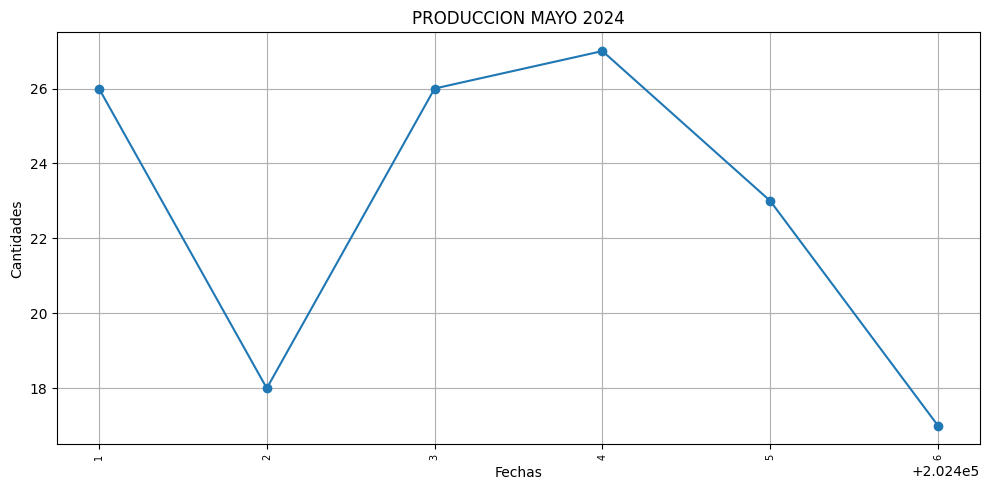

In [180]:
# SIN DISTINCION DE BIOMETRICO O CHIP
product ='Prepago'
ope = 'Linea Nueva'
seller ='42736341'

light_product = data_unique['PRODUCT'].str.contains(product)
filtered_data_light_product = data_unique[light_product]

light_ope = filtered_data_light_product['OPE_VENTA'].str.contains(ope)
filtered_data = filtered_data_light_product[light_ope]

light_seller = filtered_data['DOCUMENT_NRO_SELLER']==seller
filtered_seller = filtered_data[light_seller]
#filtered_seller

#periodos
periods = filtered_seller['PERIOD']
unique_periods = periods.drop_duplicates()

composed_periods = []
light_period = []

for i, row in unique_periods.items():
    light_period = filtered_seller['PERIOD']==row
    light_final = filtered_seller[light_period].shape
    composed_periods.append([row,light_final[0]])

np_composed_periods = np.array(composed_periods)
np_periods_qnt = np_composed_periods[:,1]
np_arr_qnt = np_periods_qnt.astype(np.int32)

plt.figure(figsize=(10,5))
plt.plot(np_composed_periods[:,0],np_arr_qnt, marker='o')
plt.xlabel('Fechas')
plt.ylabel('Cantidades')
plt.title('PRODUCCION MAYO 2024')

plt.grid(True)
plt.xticks(rotation=90, fontsize=7)
plt.tight_layout()

plt.show()

In [31]:
#CHIPS
ruc_tp="20608475240"

light_ruc = data_unique['CHIP_RUC'] == ruc_tp
filtered_light_ruc = data_unique[light_ruc]

filtered_light_ruc.shape

(1279, 46)

# PRODUCCION DE 1 MES EN ESPECIFICO POR DIA

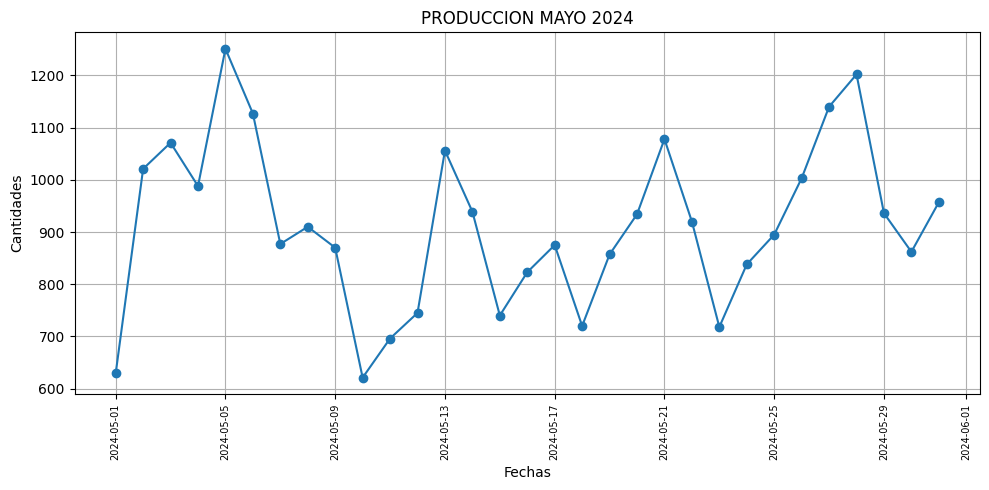

In [51]:
mes = ''

days = data['FECHA_VENTA']
unique_days = days.drop_duplicates()

composed_days = []
light = []

for i,row in unique_days.items():
    light = data['FECHA_VENTA']==row
    final = data[light].shape
    composed_days.append([row,final[0]])

np_composed_days = np.array(composed_days) # np_arr
np_days_qnt = np_composed_days[:,1] # np_arr string
np_arr_qnt = np_days_qnt.astype(np.int32) # np_arr int

np_composed_days_date = np.array([np.datetime64(convertir_fecha(fecha)) for fecha in np_composed_days[:, 0]])
sorted_index = np.argsort(np_composed_days_date)
np_composed_days_date_sorted = np_composed_days_date[sorted_index]
np_composed_days_qnt_sorted = np_arr_qnt[sorted_index]

plt.figure(figsize=(10,5))
plt.plot(np_composed_days_date_sorted,np_composed_days_qnt_sorted, marker='o')
plt.xlabel('Fechas')
plt.ylabel('Cantidades')
plt.title('PRODUCCION MAYO 2024')

plt.grid(True)
plt.xticks(rotation=90, fontsize=7)
plt.tight_layout()

plt.show()

# Configuracion Final

In [ ]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')

In [3]:
movimientos = pd.read_excel("./../data/movs.xls",sheet_name="Hoja1")

In [4]:
movimientos

,TIPO,FECHA,BIO,DOCUMENTO,PERSONA,EMPRESA
0,R,2023-06-20,1850I001287,NaN,Dante Valdiviezo Lopez,MEGA
1,E,2023-06-20,2150I012810,NaN,Dante Valdiviezo Lopez,SAC
2,E,2023-06-20,1648I218790,NaN,Nancy Saldaña Huaytangare,TIPTEL
3,R,2023-06-20,1933I012411,NaN,Nancy Saldaña Huaytangare,MEGA
4,R,2023-06-21,2145I007926,NaN,Jhonny Llancce,SACD
...,...,...,...,...,...,...
1463,E,2024-08-13,2150I013529,Reemplazo Dañado,Bladimir Gregorio Mendoza - Elizabeth,SAC
1464,R,2024-08-14,2324I004676,Dañado,Doris Lita Simon Reyes - Elizabeth,SAC
1465,E,2024-08-14,2324I003626,Reemplazo Dañado,Doris Lita Simon Reyes - Elizabeth,SAC
1466,E,2024-08-14,2150I013613,???,Yurico María Prado Mori - Estrella,SAC


In [3]:
# Leer el archivo Excel
df = pd.read_excel("./../data/movs.xls",sheet_name="Hoja1")

# Separar las entregas y retiros en dos DataFrames
df_entrega = df[df['TIPO'] == 'E'].rename(columns={'FECHA': 'ENTREGA'})
df_retiro = df[df['TIPO'] == 'R'].rename(columns={'FECHA': 'RETIRO'})

# Eliminar la columna TIPO porque ya no es necesaria
df_entrega = df_entrega.drop(columns=['TIPO'])
df_retiro = df_retiro.drop(columns=['TIPO'])

# Unir los DataFrames en base a 'BIO' y 'PERSONA'
df_final = pd.merge(df_entrega, df_retiro, on=['BIO', 'PERSONA'], how='outer')

# Reorganizar las columnas
df_final = df_final[['ENTREGA', 'RETIRO', 'BIO', 'PERSONA']]

print(df_final)

,TIPO,RETIRO,BIO,DOCUMENTO,PERSONA,EMPRESA
0,R,2023-06-20,1850I001287,NaN,Dante Valdiviezo Lopez,MEGA
3,R,2023-06-20,1933I012411,NaN,Nancy Saldaña Huaytangare,MEGA
4,R,2023-06-21,2145I007926,NaN,Jhonny Llancce,SACD
5,R,2023-06-21,2042I009530,NaN,Luis Pro nuevo,TIPTEL
7,R,2023-06-21,2150I011898,NaN,Darwin Rodriguez,SAC
...,...,...,...,...,...,...
1458,R,2024-08-13,2324I003626,Baja,Wendy Roxette Castillo Nieto - Elizabeth,SAC
1459,R,2024-08-13,2324I003945,Baja,Wendy Roxette Castillo Nieto - Elizabeth,SAC
1460,R,2024-08-13,2150I011868,Producción Baja,Ronald Alvaro Diaz Parisaca - Tiper,SAC
1462,R,2024-08-13,2324I005423,Dañado,Bladimir Gregorio Mendoza - Elizabeth,SAC


In [4]:
# Leer el archivo Excel
df = pd.read_excel("./../data/movs.xls",sheet_name="Hoja1")

# Convertir la columna de fechas a tipo datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Separar las entregas y retiros en dos DataFrames
df_entrega = df[df['TIPO'] == 'E'].copy()
df_retiro = df[df['TIPO'] == 'R'].copy()

# Renombrar las columnas de fecha para claridad
df_entrega = df_entrega.rename(columns={'FECHA': 'ENTREGA'})
df_retiro = df_retiro.rename(columns={'FECHA': 'RETIRO'})

# Inicializar una lista para almacenar los resultados
resultados = []

# Iterar sobre cada fila de entregas
for idx_entrega, row_entrega in df_entrega.iterrows():
    # Filtrar los retiros que ocurren después de la entrega actual para el mismo BIO y PERSONA
    retiros_posteriores = df_retiro[
        (df_retiro['BIO'] == row_entrega['BIO']) & 
        (df_retiro['PERSONA'] == row_entrega['PERSONA']) &
        (df_retiro['RETIRO'] > row_entrega['ENTREGA'])
    ]
    
    if not retiros_posteriores.empty:
        # Obtener el retiro más cercano a la fecha de entrega
        retiro_cercano = retiros_posteriores.loc[retiros_posteriores['RETIRO'].idxmin()]
        
        # Añadir la combinación a la lista de resultados
        resultados.append({
            'ENTREGA': row_entrega['ENTREGA'],
            'RETIRO': retiro_cercano['RETIRO'],
            'BIO': row_entrega['BIO'],
            'PERSONA': row_entrega['PERSONA']
        })
        
        # Eliminar el retiro ya emparejado para evitar reutilizarlo
        df_retiro = df_retiro.drop(retiro_cercano.name)

# Convertir los resultados en un DataFrame
df_final = pd.DataFrame(resultados)

# Exportar el DataFrame resultante a un archivo Excel
df_final.to_excel('ruta_de_salida.xlsx', index=False)

print(df_final)

       ENTREGA     RETIRO          BIO  \
0   2023-06-22 2023-06-23  2150I010832   
1   2023-06-22 2023-06-29  1648I202186   
2   2023-06-23 2023-07-05  2042I009530   
3   2023-06-29 2023-11-17  2150I012847   
4   2023-06-29 2023-08-07  1648I202186   
..         ...        ...          ...   
97  2024-07-17 2024-08-08  1648I277953   
98  2024-07-20 2024-08-01  1725I013053   
99  2024-07-22 2024-08-12  2150I013529   
100 2024-07-26 2024-08-12  2224I010319   
101 2024-08-02 2024-08-13  2324I003945   

                                           PERSONA  
0                                 Maria de la Cruz  
1                        Junior Omar Reyes Bermejo  
2                            Moises Aguilar Pretel  
3                       Maria Julia Delgado Flores  
4                                 Mariciela Castro  
..                                             ...  
97                    Eduardo Okada Sayán - Evelin  
98               Camelia Campuzano Lezama - Zulema  
99         Julia O

In [5]:
df_final.to_excel('./../exportacion2.xlsx',index=False)

In [70]:
# Leer el archivo Excel
df = pd.read_excel("./../data/movs.xls",sheet_name="Hoja1")

mi_resultado=[]

for i,row in df.iterrows():
    #print(row['BIO'])
    entrega=''
    retiro=''
    found = False
    
    if row['TIPO']=='E':
        entrega=row['FECHA']
        
    if row['TIPO']=='R':
        lastindex=0
        retiro=row['FECHA']
        
        for j,jrow in enumerate(mi_resultado):
            #print('validar: row',row['BIO'],' vs jrow',jrow['BIO'])
            if jrow['BIO']==row['BIO']:
                lastindex=j
                if mi_resultado[j]['RETIRO'] and len(str(mi_resultado[j]['RETIRO'])) > 0: #len(mi_resultado[j]['RETIRO']) > 0: #pd.notna(mi_resultado[j]['RETIRO']): #sin 605 | con 731 | ahora 613
                    #print(mi_resultado[j])
                    #print(pd.notna(mi_resultado[j]['RETIRO']))
                    continue
                mi_resultado[j]['RETIRO']=retiro
                found=True
                #print('-',j)
                
            #print('retiro', lastindex)
    
    if found:
        continue
        
    mi_resultado.append({
            'ENTREGA': entrega,
            'RETIRO': retiro,
            'BIO': row['BIO'],
            'PERSONA': row['PERSONA']
        })

#df_final_df = pd.DataFrame(mi_resultado)
#df_final_df.iloc[70:80]

df_final_df.to_excel('ruta_de_salida_para_xtefy.xlsx', index=False)
    
#df_final_df

In [ ]:
#df_final_df = pd.DataFrame(mi_resultado)

#for i,row in df_final_df.iterrows():
#    if row['BIO']=='2324I006384':
#        print(row['BIO'])
#        print('si',i)
#        continue
#    print(row['BIO'])

#df_final_df

In [34]:
for i,row in df_final_df.iterrows():
    if pd.isna(row['RETIRO']):
        print('is nat')
    print(row['RETIRO'])

2024-08-01 00:00:00
is nat
NaT
is nat
NaT
is nat
NaT
2024-07-22 00:00:00
2024-04-19 00:00:00
2024-04-22 00:00:00
is nat
NaT
2024-01-03 00:00:00
2024-01-03 00:00:00
is nat
NaT
2024-07-18 00:00:00
2024-07-01 00:00:00
is nat
NaT
2024-01-03 00:00:00
is nat
NaT
is nat
NaT
is nat
NaT
is nat
NaT
2024-08-13 00:00:00
2024-01-04 00:00:00
is nat
NaT
is nat
NaT
2024-07-16 00:00:00
2024-07-22 00:00:00
2024-07-18 00:00:00
2024-02-15 00:00:00
2024-05-24 00:00:00
2024-01-08 00:00:00
2024-08-14 00:00:00
2024-08-14 00:00:00
2024-01-09 00:00:00
is nat
NaT
2024-01-09 00:00:00
is nat
NaT
2024-01-10 00:00:00
is nat
NaT
2024-07-22 00:00:00
2024-01-12 00:00:00
is nat
NaT
is nat
NaT
2024-04-30 00:00:00
is nat
NaT
2024-01-13 00:00:00
is nat
NaT
2024-08-12 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-03-28 00:00:00
2024-04-13 00:00:00
2024-04-13 00:00:00
is nat
NaT
2024-04-30 00:00:00
2024-07-11 00:00:00
2024-01-18 00:00:00
2024-01-18 00:00:00
2024-08-12 00:00:00
2024-07-18 00:00:00
2024-07-16 00:00:00
